This is a really simple toy example to demonstrate prior dependence in mean-squared error (MSE) regression.

Suppose there is some real world quantity whose true value $z_T$ is normally distributed with mean $\mu$ and standard deviation $\sigma$. We have a detector that probes this quantity, and its response $x_D$ is drawn from the normal distribution centered at the true value $z_T$, with standard deviation $\epsilon$. We want to infer the true value $z_T$ given detector response $x_D$. 

Maximum-likelihood would tell us that the most likely true value when we see detector response $x_D$ is simply $z_T = x_D$. With some math, one can show that MSE regression says that the true value is $$ \frac{\epsilon^2 \mu + \sigma^2 x_D}{\epsilon^2 + \sigma^2}. $$ 

It is clear that they give different answers. It is also easy to see that the MSE answer depends on $\mu, \sigma,$ and $\epsilon$, i.e. the priors from which the training data is drawn.

As a even more concrete example, we simulate the above setup with $\mu = 0$, $\sigma=1$, and $\epsilon=2$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

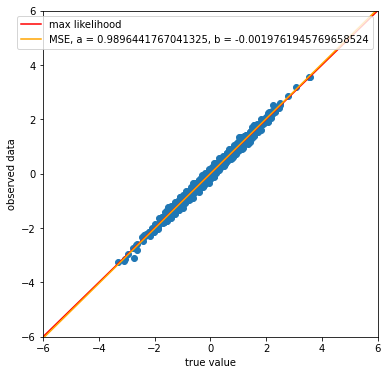

In [3]:
mu = 0
sigma = 1
epsilon = 0.1
N = 1000

true_vals = np.random.normal(mu, sigma, N)
detector_response = np.array([np.random.normal(z, epsilon) for z in true_vals])

fit = np.polyfit(detector_response, true_vals, 1)

fig = plt.figure(figsize=(6,6))
plt.scatter(true_vals, detector_response)
plt.plot(np.linspace(-6+mu,6+mu,3), np.linspace(-6+mu,6+mu,3), color='red', label="max likelihood")
plt.plot(fit[0]*np.linspace(-6+mu,6+mu,3)+fit[1], np.linspace(-6+mu,6+mu,3),  color='orange', \
         label=f"MSE, a = {fit[0]}, b = {fit[1]}")
plt.xlim(-6+mu,6+mu)
plt.ylim(-6+mu,6+mu)
plt.ylabel("observed data")
plt.xlabel("true value")
#plt.title(f"mu = {mu}, sigma = {sigma}, epsilon = {epsilon}")
plt.legend()

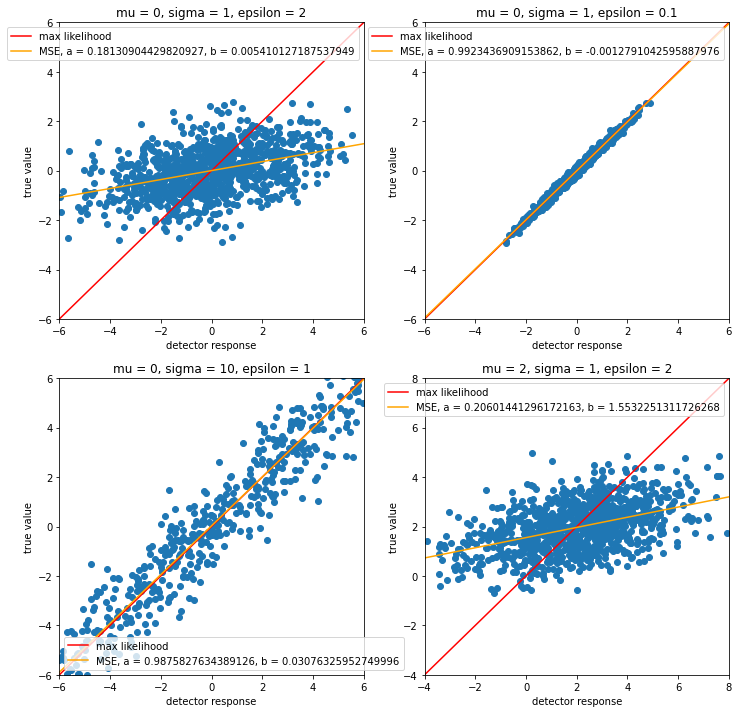

In [4]:
data = {}
params = [(0,1,2), (0,1,0.1), (0,10,1),(2,1,2)]
N = 1000

fig = plt.figure(figsize=(12,12))

for i, param in enumerate(params):
    mu, sigma, epsilon = param
    true_vals = np.random.normal(mu, sigma, N)
    detector_response = np.array([np.random.normal(z, epsilon) for z in true_vals])

    fit = np.polyfit(detector_response, true_vals, 1)
    plt.subplot(2,2,i+1)
    plt.scatter(detector_response, true_vals)
    plt.plot(np.linspace(-6+mu,6+mu,3), np.linspace(-6+mu,6+mu,3), color='red', label="max likelihood")
    plt.plot(np.linspace(-6+mu,6+mu,3), fit[0]*np.linspace(-6+mu,6+mu,3)+fit[1], color='orange', \
             label=f"MSE, a = {fit[0]}, b = {fit[1]}")
    plt.xlim(-6+mu,6+mu)
    plt.ylim(-6+mu,6+mu)
    plt.xlabel("detector response")
    plt.ylabel("true value")
    plt.title(f"mu = {mu}, sigma = {sigma}, epsilon = {epsilon}")
    plt.legend()